In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
#classic
classic_client_df = pd.read_csv('logs/classic/client_log.csv')
classic_server_df = pd.read_csv('logs/classic/server_log.csv')

In [80]:
#pqc
pqc_client_df = pd.read_csv('logs/pqc/client_log.csv')
pqc_server_df = pd.read_csv('logs/pqc/server_log.csv')

In [84]:
#hybrid
hybrid_client_df = pd.read_csv('logs/hybrid/client_log.csv')
hybrid_server_df = pd.read_csv('logs/hybrid/server_log.csv')

In [66]:
dataframes = [
    ('Classic Client', classic_client_df),
    ('Classic Server', classic_server_df),
    ('PQC Client', pqc_client_df),
    ('PQC Server', pqc_server_df),
    ('Hybrid Client', hybrid_client_df),
    ('Hybrid Server', hybrid_server_df),
]

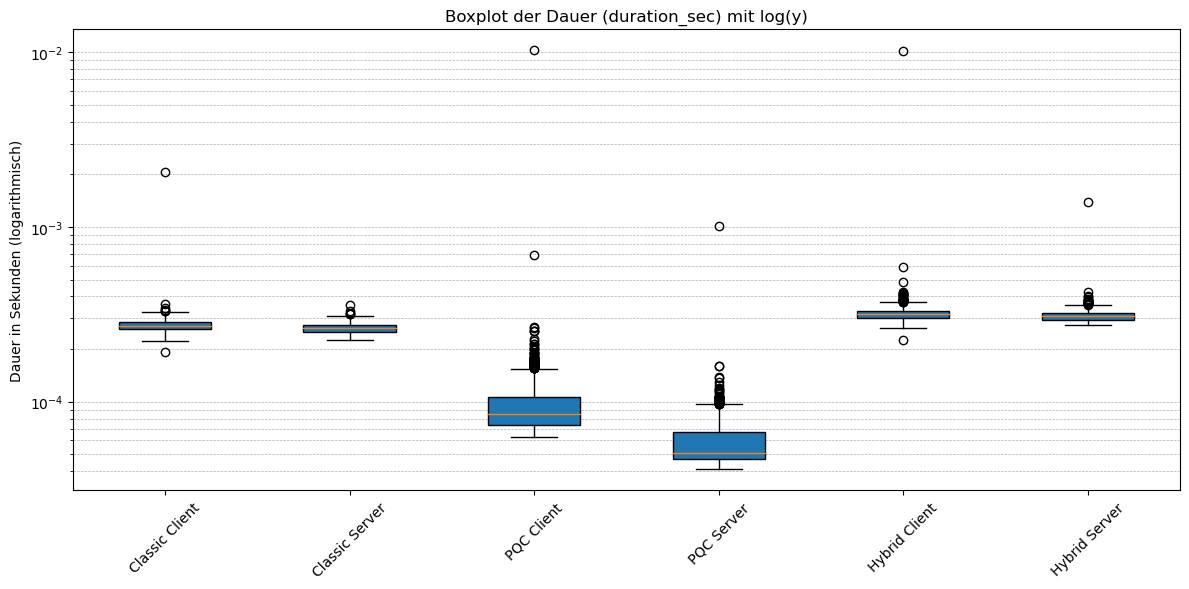

In [69]:
duration_data = [df['duration_sec'] for label, df in dataframes]
labels = [label for label, df in dataframes]

# Boxplot erstellen
plt.figure(figsize=(12, 6))
plt.boxplot(duration_data, labels=labels, patch_artist=True)
plt.yscale('log')  # Logarithmische Skala hier aktivieren!
plt.title('Boxplot der Dauer (duration_sec) mit log(y)')
plt.ylabel('Dauer in Sekunden (logarithmisch)')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [70]:
classic_client_df["duration_sec"].median(), classic_server_df["duration_sec"].median()


(0.0002721548, 0.0002632141)

In [71]:
pqc_client_df["duration_sec"].median(), pqc_server_df["duration_sec"].median()


(8.4877e-05, 5.10216e-05)

In [72]:
hybrid_client_df["duration_sec"].median(), hybrid_server_df["duration_sec"].median()


(0.0003159046, 0.0003111362)

In [56]:
0.0003072023/0.0002609491

1.177249892795185

(0.0003107786, 0.0003011227)

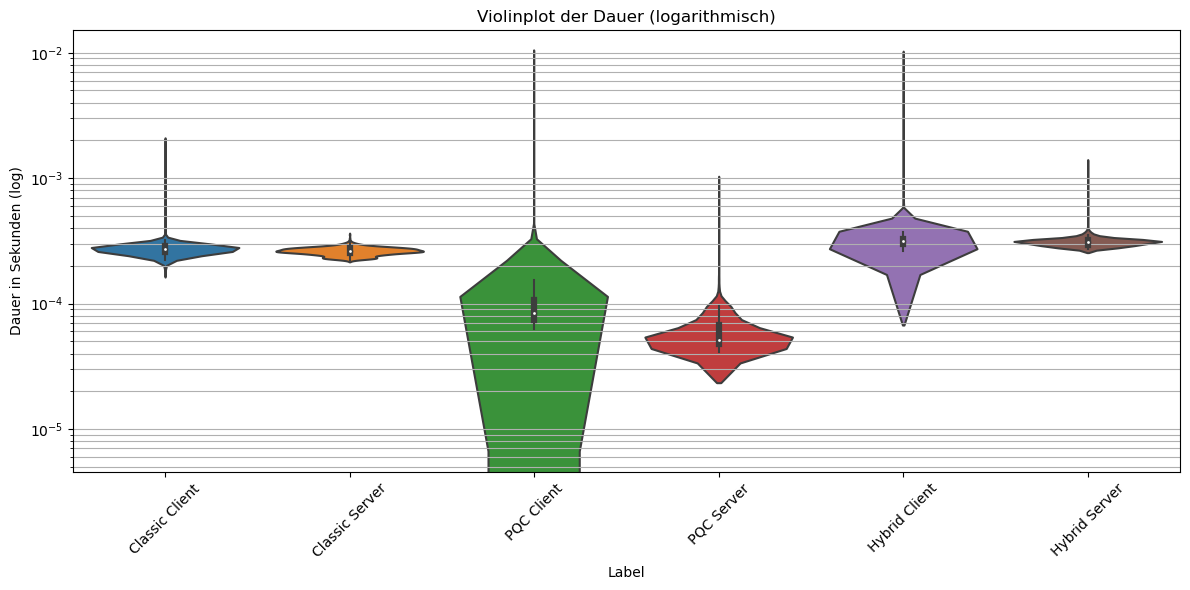

In [73]:
import seaborn as sns

# Daten vorbereiten
import pandas as pd
df_list = []
for label, df in dataframes:
    temp = df[['duration_sec']].copy()
    temp['Label'] = label
    df_list.append(temp)

merged_df = pd.concat(df_list)

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_df, x='Label', y='duration_sec', scale='width')
plt.yscale('log')
plt.title('Violinplot der Dauer (logarithmisch)')
plt.ylabel('Dauer in Sekunden (log)')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()


/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.p

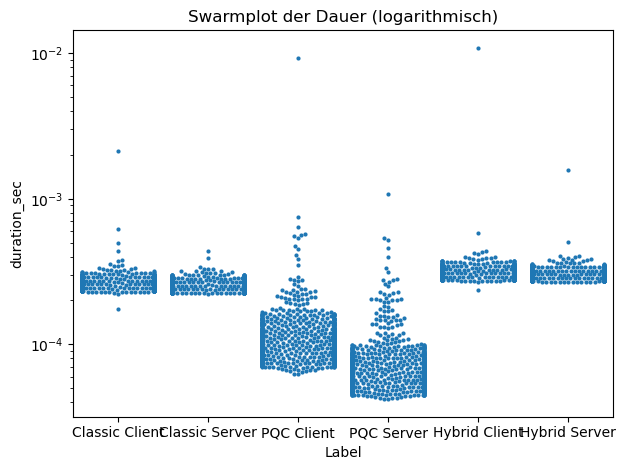

In [44]:
sns.swarmplot(data=merged_df, x='Label', y='duration_sec', size=3)
plt.yscale('log')
plt.title('Swarmplot der Dauer (logarithmisch)')
plt.tight_layout()


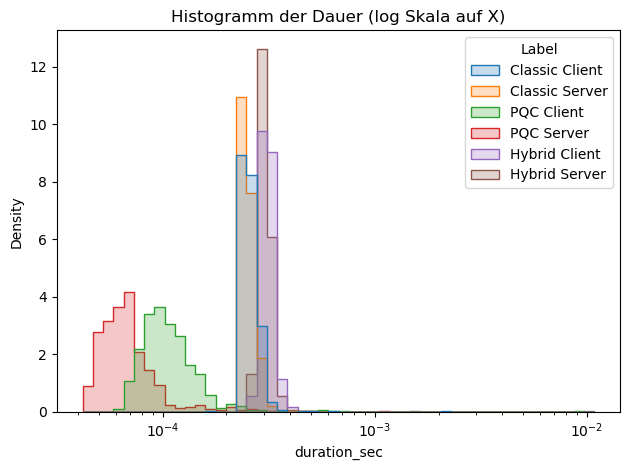

In [45]:
sns.histplot(data=merged_df, x='duration_sec', hue='Label', log_scale=(True, False), element='step', stat='density', common_norm=False)
plt.title('Histogramm der Dauer (log Skala auf X)')
plt.tight_layout()


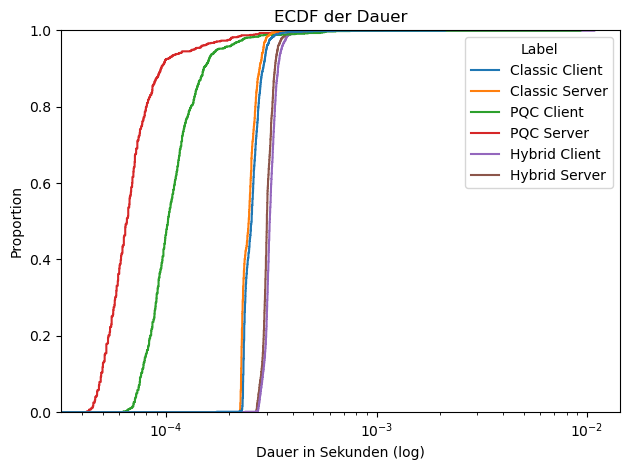

In [46]:
sns.ecdfplot(data=merged_df, x='duration_sec', hue='Label', log_scale=True)
plt.title('ECDF der Dauer')
plt.xlabel('Dauer in Sekunden (log)')
plt.tight_layout()


In [61]:
hybrid_server_df["ram_percent"].median()

72.6

In [74]:
def summarize_metrics(df, label):
    summary = df[["duration_sec", "cpu_percent", "ram_percent"]].astype(float).agg(['mean', 'median']).T
    summary.columns = [f"{label}_mean", f"{label}_median"]
    return summary

In [85]:
summary_df = pd.concat([
    summarize_metrics(classic_client_df, "classic_client"),
    summarize_metrics(classic_server_df, "classic_server"),
    summarize_metrics(pqc_client_df, "pqc_client"),
    summarize_metrics(pqc_server_df, "pqc_server"),
    summarize_metrics(hybrid_client_df, "hybrid_client"),
    summarize_metrics(hybrid_server_df, "hybrid_server")
], axis=1)

summary_df

,classic_client_mean,classic_client_median,classic_server_mean,classic_server_median,pqc_client_mean,pqc_client_median,pqc_server_mean,pqc_server_median,hybrid_client_mean,hybrid_client_median,hybrid_server_mean,hybrid_server_median
duration_sec,0.000258,0.000249,0.000249,0.000246,0.000115,0.000098,0.00006,0.000051,0.000334,0.000319,0.000311,0.000311
cpu_percent,0.008600,0.000000,0.028500,0.000000,0.016300,0.000000,0.00980,0.000000,0.106800,0.000000,0.010300,0.000000
ram_percent,74.000000,74.000000,73.200000,73.200000,73.600000,73.600000,73.10000,73.100000,74.000000,74.000000,73.299900,73.300000


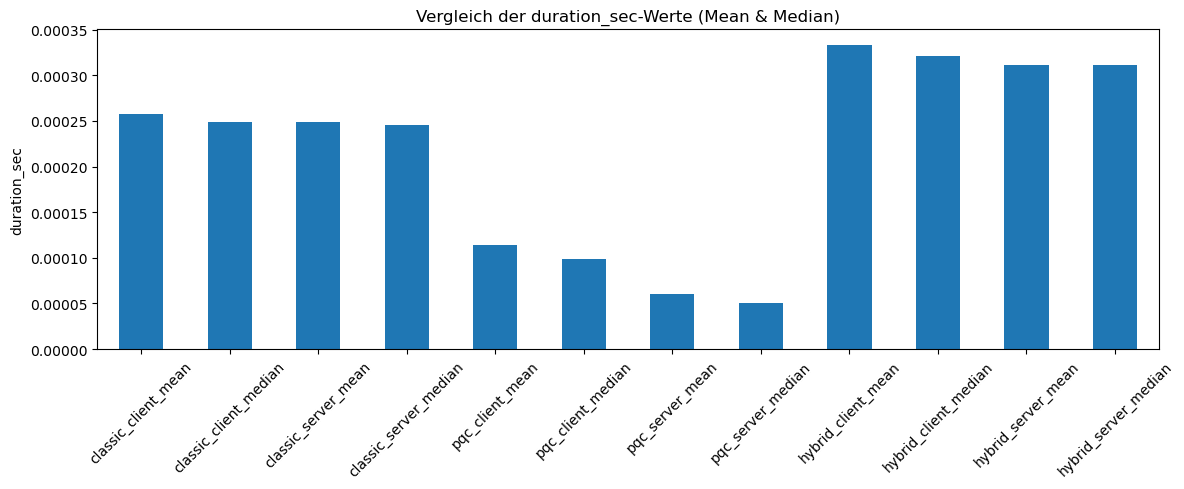

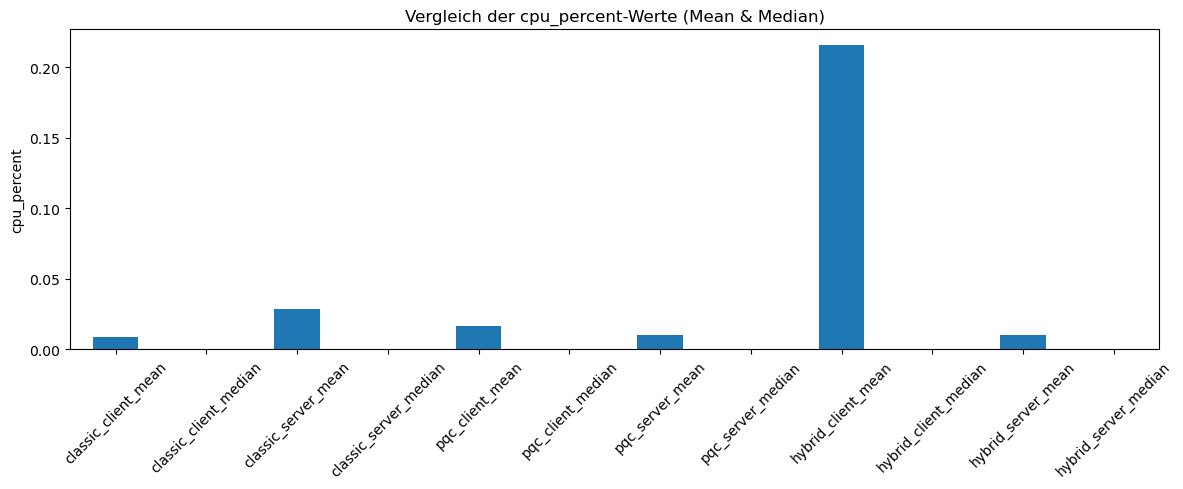

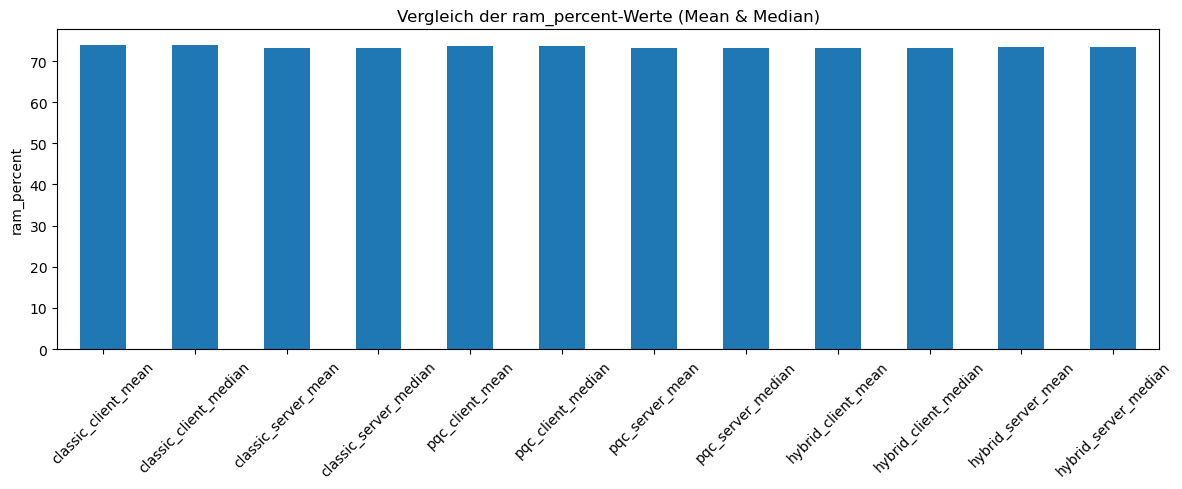

In [83]:
# Liste der Metriken
metrics = ["duration_sec", "cpu_percent", "ram_percent"]

# Visualisierung: Balkendiagramme für jede Metrik
for metric in metrics:
    ax = summary_df.loc[metric].plot(
        kind="bar",
        figsize=(12, 5),
        title=f"Vergleich der {metric}-Werte (Mean & Median)",
        ylabel=metric,
        rot=45,
        legend=False
    )
    plt.tight_layout()
    plt.show()
